#training log analysis

In [89]:
#imports
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
import datetime

In [90]:
def parseDate(str):
    return datetime.datetime.strptime(str, "%Y-%m-%d")

squatsData = pd.read_csv('data/allSquats.csv', parse_dates = ['date'], date_parser = parseDate, index_col='date')
squatsData.columns

Index(['exercise', 'sets', 'reps', 'weight', 'unit'], dtype='object')

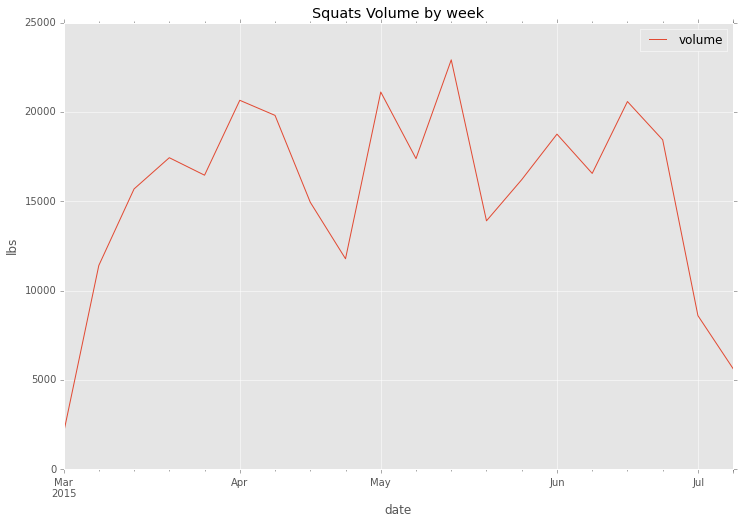

In [111]:
def toVolume(parameters):
    return parameters['sets']*parameters['reps']*parameters['weight']
squatsVolume = squatsData.copy()
squatsVolume['volume'] = squatsData.apply(toVolume, axis='columns')
squatsVolume.drop(['sets','reps','weight'], axis=1, inplace=True)

squatsVolumePlot = squatsVolume.resample('W', how = sum).plot(figsize=(12, 8), title = 'Squats Volume by week')
squatsVolumePlot.set_ylabel('lbs')